In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import matplotlib.pyplot as plt

c:\Users\User\anaconda3\envs\hsenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
if torch.cuda.is_available():
    print("GPU is available!")
    print("Number of GPUs:", torch.cuda.device_count())
    print("Current GPU:", torch.cuda.get_device_name(0))
else:
    print("GPU is not available.")


GPU is available!
Number of GPUs: 1
Current GPU: NVIDIA GeForce RTX 3050


In [ ]:
# Check if GPU is available
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[]


### Without batch normalization

In [ ]:
# Define Transformer model for classification without batch normalization
class CustomTransformer(nn.Module):
    def __init__(self, input_size, num_classes, d_model=64, nhead=8, num_encoder_layers=3, dim_feedforward=128, dropout=0.1):
        super(CustomTransformer, self).__init__()
        self.input_projection = nn.Linear(input_size, d_model)  # Project input to model dimension
        self.positional_encoding = nn.Parameter(torch.zeros(1, 5000, d_model))  # Positional Encoding
        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=d_model,
                nhead=nhead,
                dim_feedforward=dim_feedforward,
                dropout=dropout,
                batch_first=True,  # Ensure batch is first dim
            ),
            num_layers=num_encoder_layers,
        )
        self.fc = nn.Linear(d_model, num_classes)  # Final classification layer

    def forward(self, x):
        # Project input to d_model dimension
        x = self.input_projection(x)
        
        # Add positional encoding
        seq_len = x.size(1)
        x = x + self.positional_encoding[:, :seq_len, :]
        
        # Pass through Transformer Encoder
        x = self.encoder(x)
        
        # Take the last token's representation for classification
        x = x[:, -1, :]
        x = self.fc(x)
        return x


In [2]:
video_directory = 'Latest-WLASL-100'

total = 0

gesture_folder = np.array(os.listdir(video_directory))
for gestures in gesture_folder:
    gesture = []

    for fname in os.listdir(os.path.join(video_directory, gestures)):
        path = os.path.join(video_directory, gestures, fname)
        if os.path.isdir(path):
            gesture.append(fname)

    total += len(gesture) 
    # print(gestures, end =" : ")        
    # print(len(gesture))

print("Total gestures: ", len(gesture_folder), "; Total videos: ", total)

Total gestures:  100 ; Total videos:  4086


In [3]:
label_map = {label: num for num, label in enumerate(gesture_folder)}
len(label_map)

100

In [6]:
gesture_sequence, labels = [], []

for gesture_name in gesture_folder:  # e.g., 'about'
    gesture_instances = []

    # List directories inside the gesture folder
    gesture_path = os.path.join(video_directory, gesture_name)
    for instance in os.listdir(gesture_path):
        # print(instance)
        instance_path = os.path.join(gesture_path, instance)
        if os.path.isdir(instance_path):
            # Check for the extra subfolder 'interpolated_landmarks'
            landmarks_path = os.path.join(instance_path, 'landmarks_normalized')
            if os.path.isdir(landmarks_path):
                gesture_instances.append(landmarks_path)
            # else:
                # gesture_instances.append(instance_path)

    for load_path in gesture_instances:
        print("Load : ", load_path)
        npy_files = [f for f in os.listdir(load_path) if f.endswith('.npy')]
        # Sort files by numeric part if needed
        npy_files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

        video = []
        for npy in npy_files:
            video.append(np.load(os.path.join(load_path, npy)))
        
        # Optionally check if video is not empty before appending
        if video:
            gesture_sequence.append(video)
            labels.append(label_map[gesture_name])
        else:
            print(f"Warning: No .npy files found in {load_path}")

X = np.array(gesture_sequence)
y = np.array(labels)

np.save('X_TRAIN_landmarks_normalized.npy', X)
np.save('y_TRAIN_landmarks_normalized.npy', y)

print("X shape:", X.shape)
print("y shape:", y.shape)

Load :  Latest-WLASL-100\accident\1\landmarks_normalized
Load :  Latest-WLASL-100\accident\10\landmarks_normalized
Load :  Latest-WLASL-100\accident\11\landmarks_normalized
Load :  Latest-WLASL-100\accident\12\landmarks_normalized
Load :  Latest-WLASL-100\accident\13\landmarks_normalized
Load :  Latest-WLASL-100\accident\14\landmarks_normalized
Load :  Latest-WLASL-100\accident\15\landmarks_normalized
Load :  Latest-WLASL-100\accident\16\landmarks_normalized
Load :  Latest-WLASL-100\accident\17\landmarks_normalized
Load :  Latest-WLASL-100\accident\18\landmarks_normalized
Load :  Latest-WLASL-100\accident\19\landmarks_normalized
Load :  Latest-WLASL-100\accident\2\landmarks_normalized
Load :  Latest-WLASL-100\accident\20\landmarks_normalized
Load :  Latest-WLASL-100\accident\21\landmarks_normalized
Load :  Latest-WLASL-100\accident\22\landmarks_normalized
Load :  Latest-WLASL-100\accident\23\landmarks_normalized
Load :  Latest-WLASL-100\accident\24\landmarks_normalized
Load :  Latest-W

In [ ]:
# video_directory = 'TRAIN_6'

# sum = 0

# gesture_folder = np.array(os.listdir(video_directory))
# for gestures in gesture_folder:
#     gesture = []

#     for fname in os.listdir(os.path.join(video_directory, gestures)):
#         path = os.path.join(video_directory, gestures, fname)
#         if os.path.isdir(path):
#             gesture.append(fname)

#     sum += len(gesture) 
#     # print(gestures, end =" : ")        
#     # print(len(gesture))

# print("Total gestures: ", len(gesture_folder), "; Total videos: ", sum)

# label_map = {label: num for num, label in enumerate(gesture_folder)}

# X = np.load('train_numpy/train_6/X_TRAIN_6.npy')
# y = np.load('train_numpy/train_6/y_TRAIN_6.npy')

# y = tf.keras.utils.to_categorical(y, num_classes=len(gesture_folder))
# y_labels = np.argmax(y, axis=1)

# X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(X, y, test_size=0.2, stratify=y_labels, random_state=42)
# X_test_ori, X_val_ori, y_test_ori, y_val_ori = train_test_split(X_test_ori, y_test_ori, test_size=0.5, stratify=y_test_ori.argmax(axis=1), random_state=42)

Total gestures:  108 ; Total videos:  7143


In [4]:
X = np.load('X_TRAIN_landmarks_normalized.npy')
y = np.load('y_TRAIN_landmarks_normalized.npy')

print(X.shape, y.shape)

(4086, 512, 258) (4086,)


In [5]:
y = tf.keras.utils.to_categorical(y, num_classes=len(gesture_folder))
y.shape

(4086, 100)

In [6]:
y_labels = np.argmax(y, axis=1)

In [7]:
X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(X, y, test_size=0.2, stratify=y_labels, random_state=42)

In [8]:
X_test_ori, X_val_ori, y_test_ori, y_val_ori = train_test_split(
    X_test_ori, y_test_ori, test_size=0.5, stratify=y_test_ori.argmax(axis=1), random_state=42)

In [9]:
y_train_ori.shape, y_test_ori.shape, y_val_ori.shape

((3268, 100), (409, 100), (409, 100))

In [10]:
# Convert data to tensors
X_train = torch.tensor(X_train_ori, dtype=torch.float32)
X_test = torch.tensor(X_test_ori, dtype=torch.float32)
y_train = torch.tensor(y_train_ori.argmax(axis=1), dtype=torch.long)
y_test = torch.tensor(y_test_ori.argmax(axis=1), dtype=torch.long)
X_val = torch.tensor(X_val_ori, dtype=torch.float32)
y_val = torch.tensor(y_val_ori.argmax(axis=1), dtype=torch.long)

# DataLoader
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=32, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)



In [12]:
if torch.cuda.is_available():
    print("GPU is available!")
    print("Number of GPUs:", torch.cuda.device_count())
    print("Current GPU:", torch.cuda.get_device_name(0))
else:
    print("GPU is not available.")


GPU is available!
Number of GPUs: 1
Current GPU: NVIDIA GeForce RTX 3050


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Model, loss, and optimizer
input_size = X_train.size(-1)
num_classes = len(label_map)
model = CustomTransformer(input_size=input_size, num_classes=num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 250
loss_history = []
val_loss_history = []

# loss threshold
loss_threshold = 0.1

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    
    for X_batch, y_batch in train_loader:
        
        # Move batch to GPU
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(X_batch)  # Forward pass
        loss = criterion(outputs, y_batch)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_loss)
    
        # Validation phase
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)  # Forward pass
            loss = criterion(outputs, y_batch)  # Compute loss
            val_loss += loss.item()  # Accumulate validation loss

            # Compute accuracy
            predictions = outputs.argmax(dim=1)
            correct += (predictions == y_batch).sum().item()
            total += y_batch.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_loss_history.append(avg_val_loss)
    val_accuracy = correct / total

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')


    if avg_loss < loss_threshold:
        print(f'Loss threshold of {loss_threshold} reached. Stopping training.')
        break

# Evaluate the model
model.eval()
with torch.no_grad():
    # Move test data to GPU
    X_test = X_test.to(device)
    y_test = y_test.to(device)
    
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    accuracy = (test_outputs.argmax(dim=1) == y_test).float().mean()
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy.item():.4f}')


Epoch [1/400], Loss: 4.4863, Val Loss: 4.1994, Val Accuracy: 0.0416
Epoch [2/400], Loss: 3.9722, Val Loss: 3.9111, Val Accuracy: 0.0733
Epoch [3/400], Loss: 3.6526, Val Loss: 3.6104, Val Accuracy: 0.1002
Epoch [4/400], Loss: 3.3825, Val Loss: 3.3749, Val Accuracy: 0.1443
Epoch [5/400], Loss: 3.1457, Val Loss: 3.2061, Val Accuracy: 0.1614
Epoch [6/400], Loss: 2.9488, Val Loss: 3.0588, Val Accuracy: 0.2176
Epoch [7/400], Loss: 2.6947, Val Loss: 2.8018, Val Accuracy: 0.2738
Epoch [8/400], Loss: 2.4277, Val Loss: 2.7848, Val Accuracy: 0.2616
Epoch [9/400], Loss: 2.2165, Val Loss: 2.4736, Val Accuracy: 0.3496
Epoch [10/400], Loss: 2.0191, Val Loss: 2.2444, Val Accuracy: 0.4279
Epoch [11/400], Loss: 1.7695, Val Loss: 2.1568, Val Accuracy: 0.4450
Epoch [12/400], Loss: 1.5935, Val Loss: 1.9055, Val Accuracy: 0.5257
Epoch [13/400], Loss: 1.4389, Val Loss: 1.8056, Val Accuracy: 0.5257
Epoch [14/400], Loss: 1.2954, Val Loss: 1.6926, Val Accuracy: 0.5355
Epoch [15/400], Loss: 1.1788, Val Loss: 1.8

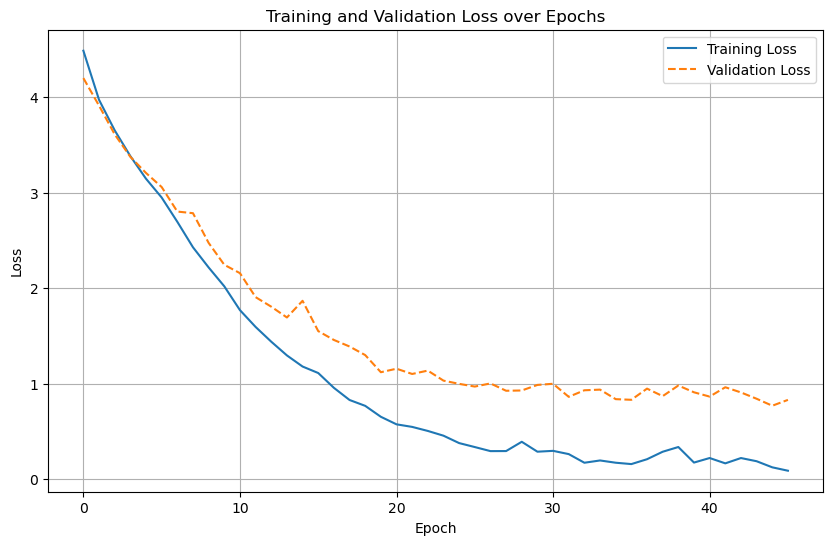

In [15]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss', linestyle='--') 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        # Move batch data to GPU
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
    
        outputs = model(X_batch)
        predicted = outputs.argmax(dim=1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

# Convert to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')


Test Accuracy: 0.8875


In [17]:
# Save the model's state dictionary
model_save_path = "Latest_WLASL_landmarks_normalized_augmented_transformer_model.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to Latest_WLASL_landmarks_normalized_augmented_transformer_model.pth


c:\Users\User\anaconda3\envs\hsenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\envs\hsenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\envs\hsenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


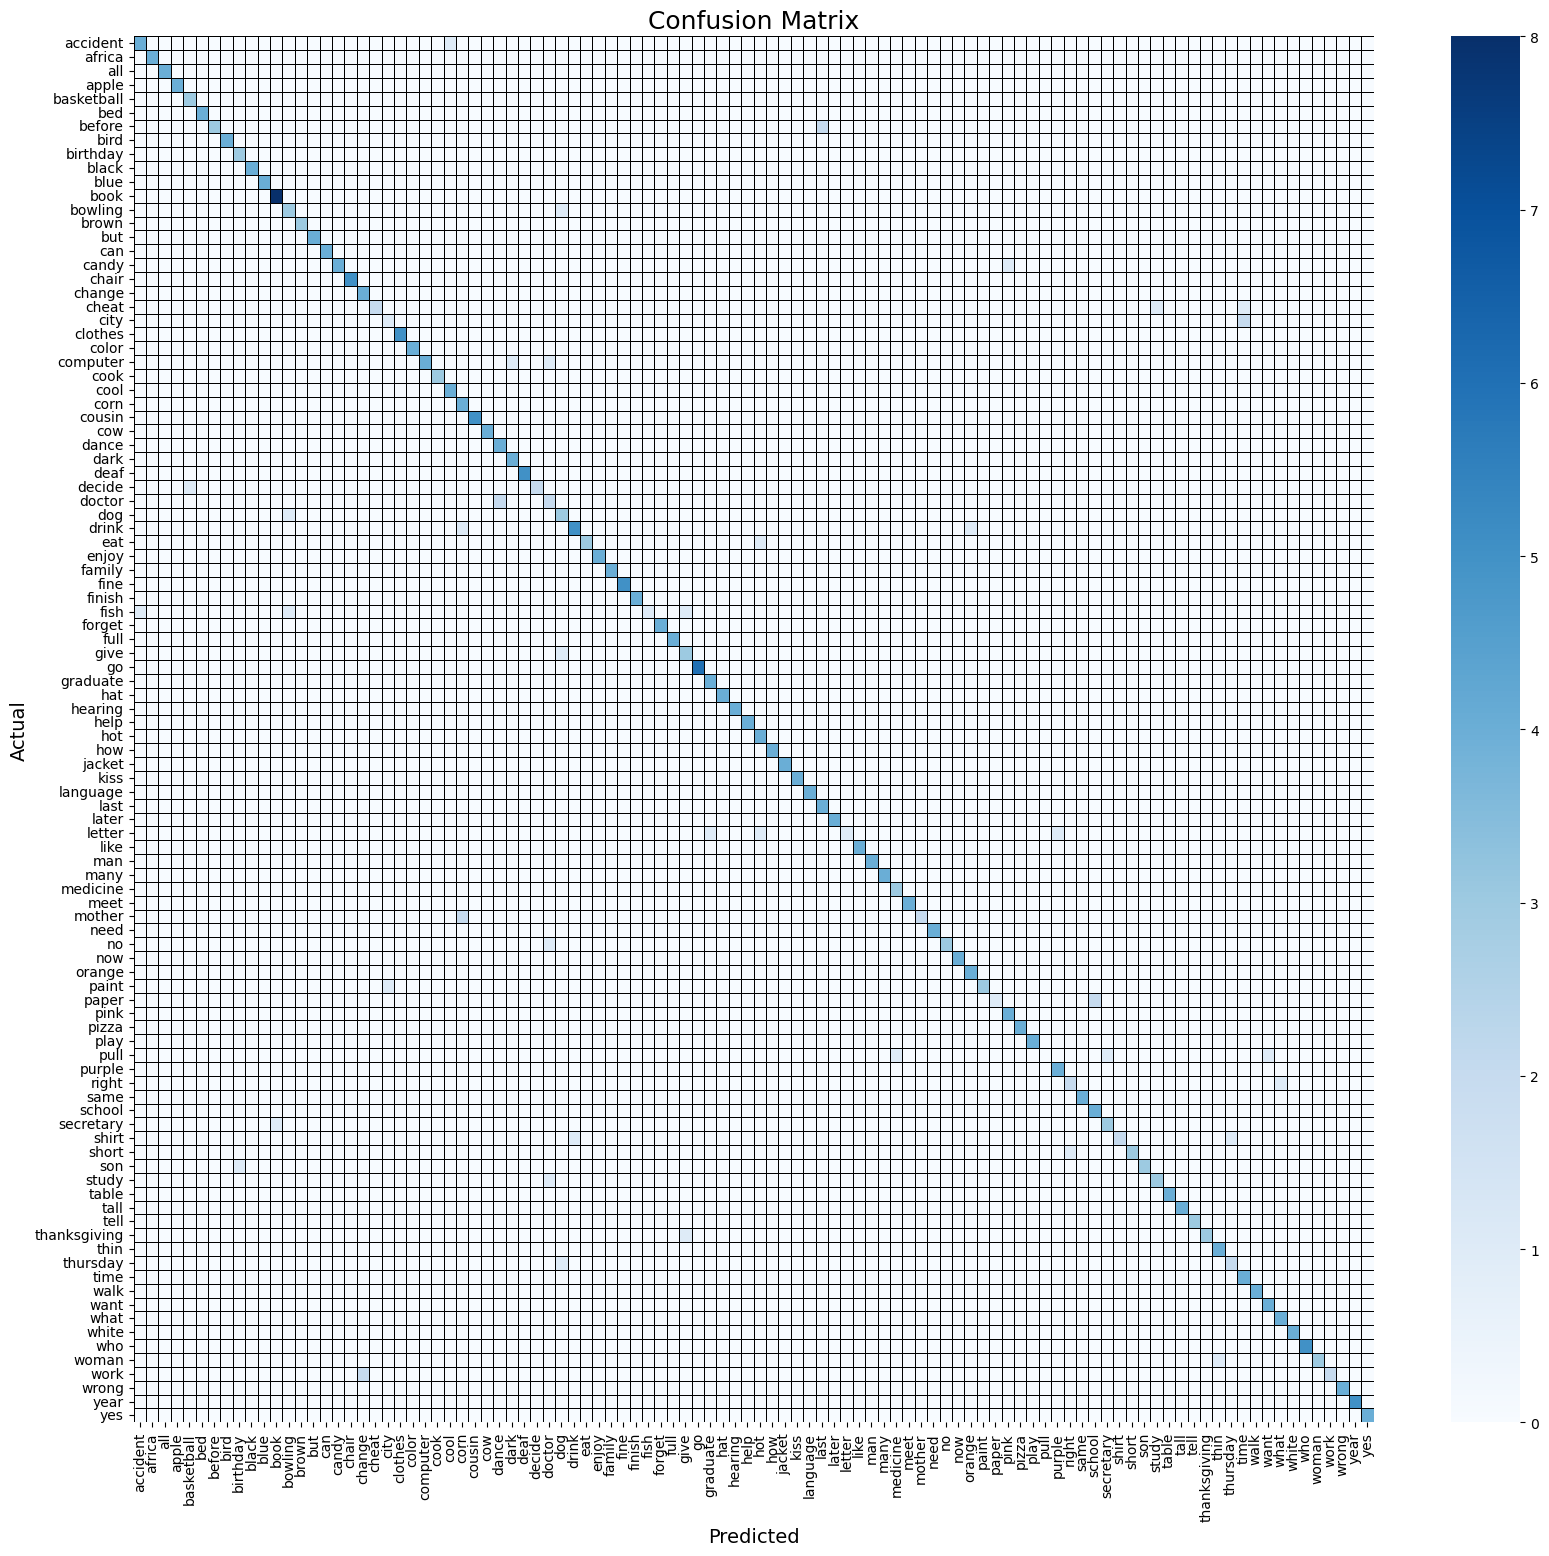

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         4
           6       1.00      0.60      0.75         5
           7       1.00      1.00      1.00         4
           8       0.75      1.00      0.86         3
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          11       0.89      1.00      0.94         8
          12       0.60      0.75      0.67         4
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      0.80      0.89         5
    

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Generate Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(all_labels, all_preds)
class_report = classification_report(all_labels, all_preds)

# Step 4: Display Confusion Matrix
plt.figure(figsize=(20, 18)) 
sns.heatmap(
    conf_matrix, 
    annot=False, 
    cmap="Blues", 
    xticklabels=list(label_map.keys()), 
    yticklabels=list(label_map.keys()), 
    linecolor='black',  # Grid color
    linewidths=0.5      # Grid line width
)
plt.title("Confusion Matrix", fontsize=18)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for better fit
plt.yticks(fontsize=10)  # Adjust font size for y-axis labels
plt.show()

# Step 5: Print Classification Report
print("Classification Report:")
print(class_report)

### With batch normalization

In [ ]:
### With batch normalization
class CustomTransformer(nn.Module):
    def __init__(self, input_size, num_classes, d_model=64, nhead=8, num_encoder_layers=3, dim_feedforward=128, dropout=0.1):
        super(CustomTransformer, self).__init__()
        self.input_projection = nn.Linear(input_size, d_model)  # Project input to model dimension
        self.input_bn = nn.BatchNorm1d(d_model)  # BatchNorm after input projection

        self.positional_encoding = nn.Parameter(torch.zeros(1, 5000, d_model))  # Positional Encoding
        
        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=d_model,
                nhead=nhead,
                dim_feedforward=dim_feedforward,
                dropout=dropout,
                batch_first=True,  # Ensure batch is first dim
            ),
            num_layers=num_encoder_layers,
        )

        self.encoder_bn = nn.BatchNorm1d(d_model)  # BatchNorm for encoder output
        self.fc = nn.Linear(d_model, num_classes)  # Final classification layer

    def forward(self, x):
        # Project input to d_model dimension
        x = self.input_projection(x)
        
        # Permute for BatchNorm: (batch_size, seq_len, d_model) -> (batch_size, d_model, seq_len)
        x = x.permute(0, 2, 1)
        x = self.input_bn(x)
        x = x.permute(0, 2, 1)  # Back to (batch_size, seq_len, d_model)

        # Add positional encoding
        seq_len = x.size(1)
        x = x + self.positional_encoding[:, :seq_len, :]

        # Pass through Transformer Encoder
        x = self.encoder(x)
        
        # Permute for BatchNorm: (batch_size, seq_len, d_model) -> (batch_size, d_model, seq_len)
        x = x.permute(0, 2, 1)
        x = self.encoder_bn(x)
        x = x.permute(0, 2, 1)  # Back to (batch_size, seq_len, d_model)

        # Take the last token's representation for classification
        x = x[:, -1, :]
        x = self.fc(x)
        return x


In [ ]:
video_directory = 'Latest-WLASL-100'

sum = 0

gesture_folder = np.array(os.listdir(video_directory))
for gestures in gesture_folder:
    gesture = []

    for fname in os.listdir(os.path.join(video_directory, gestures)):
        path = os.path.join(video_directory, gestures, fname)
        if os.path.isdir(path):
            gesture.append(fname)

    sum += len(gesture) 
    # print(gestures, end =" : ")        
    # print(len(gesture))

print("Total gestures: ", len(gesture_folder), "; Total videos: ", sum)

label_map = {label: num for num, label in enumerate(gesture_folder)}

X = np.load('X_TRAIN_landmarks.npy')
y = np.load('y_TRAIN_landmarks.npy')

y = tf.keras.utils.to_categorical(y, num_classes=len(gesture_folder))
y_labels = np.argmax(y, axis=1)

X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(X, y, test_size=0.2, stratify=y_labels, random_state=42)
X_test_ori, X_val_ori, y_test_ori, y_val_ori = train_test_split(X_test_ori, y_test_ori, test_size=0.5, stratify=y_test_ori.argmax(axis=1), random_state=42)

Total gestures:  100 ; Total videos:  2874


In [26]:
# Convert data to tensors
X_train = torch.tensor(X_train_ori, dtype=torch.float32)
X_test = torch.tensor(X_test_ori, dtype=torch.float32)
y_train = torch.tensor(y_train_ori.argmax(axis=1), dtype=torch.long)
y_test = torch.tensor(y_test_ori.argmax(axis=1), dtype=torch.long)
X_val = torch.tensor(X_val_ori, dtype=torch.float32)
y_val = torch.tensor(y_val_ori.argmax(axis=1), dtype=torch.long)

# DataLoader
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=32, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)

In [13]:
# Model, loss, and optimizer
input_size = X_train.size(-1)
num_classes = len(label_map)
model = CustomTransformer(input_size=input_size, num_classes=num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 200
loss_history = []
val_loss_history = []

# loss threshold
loss_threshold = 0.1

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    
    for X_batch, y_batch in train_loader:
        # Move batch to GPU
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(X_batch)  # Forward pass
        loss = criterion(outputs, y_batch)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_loss)
    
        # Validation phase
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)  # Forward pass
            loss = criterion(outputs, y_batch)  # Compute loss
            val_loss += loss.item()  # Accumulate validation loss

            # Compute accuracy
            predictions = outputs.argmax(dim=1)
            correct += (predictions == y_batch).sum().item()
            total += y_batch.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_loss_history.append(avg_val_loss)
    val_accuracy = correct / total

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')


    if avg_loss < loss_threshold:
        print(f'Loss threshold of {loss_threshold} reached. Stopping training.')
        break

# Evaluate the model
model.eval()
with torch.no_grad():
    # Move test data to GPU
    X_test = X_test.to(device)
    y_test = y_test.to(device)
    
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    accuracy = (test_outputs.argmax(dim=1) == y_test).float().mean()
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy.item():.4f}')

Epoch [1/200], Loss: 4.3484, Val Loss: 3.9805, Val Accuracy: 0.0758
Epoch [2/200], Loss: 3.7370, Val Loss: 3.6372, Val Accuracy: 0.1271
Epoch [3/200], Loss: 3.3593, Val Loss: 3.3894, Val Accuracy: 0.1443
Epoch [4/200], Loss: 2.9737, Val Loss: 3.1817, Val Accuracy: 0.2372
Epoch [5/200], Loss: 2.5924, Val Loss: 2.9860, Val Accuracy: 0.2225
Epoch [6/200], Loss: 2.3099, Val Loss: 2.4902, Val Accuracy: 0.3423
Epoch [7/200], Loss: 1.9109, Val Loss: 2.1567, Val Accuracy: 0.4352
Epoch [8/200], Loss: 1.7029, Val Loss: 2.1246, Val Accuracy: 0.4621
Epoch [9/200], Loss: 1.4763, Val Loss: 2.1367, Val Accuracy: 0.4132
Epoch [10/200], Loss: 1.3808, Val Loss: 1.8250, Val Accuracy: 0.5379
Epoch [11/200], Loss: 1.1054, Val Loss: 1.8082, Val Accuracy: 0.5134
Epoch [12/200], Loss: 1.0170, Val Loss: 1.5730, Val Accuracy: 0.5575
Epoch [13/200], Loss: 0.8820, Val Loss: 1.6418, Val Accuracy: 0.6039
Epoch [14/200], Loss: 0.8108, Val Loss: 1.6845, Val Accuracy: 0.5892
Epoch [15/200], Loss: 0.7489, Val Loss: 1.5

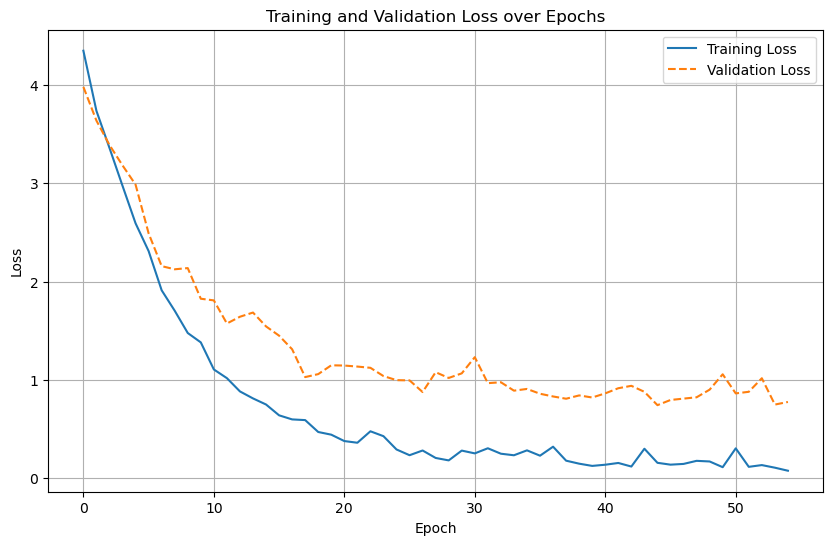

In [14]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss', linestyle='--') 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()
model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []

In [15]:
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        # Move batch data to GPU
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        predicted = outputs.argmax(dim=1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

# Convert to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.9169


In [16]:
# Save the model's state dictionary
model_save_path = "Latest_WLASL_100_landmarks_normalized_augmented_batchtransformer_model.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to Latest_WLASL_100_landmarks_normalized_augmented_batchtransformer_model.pth


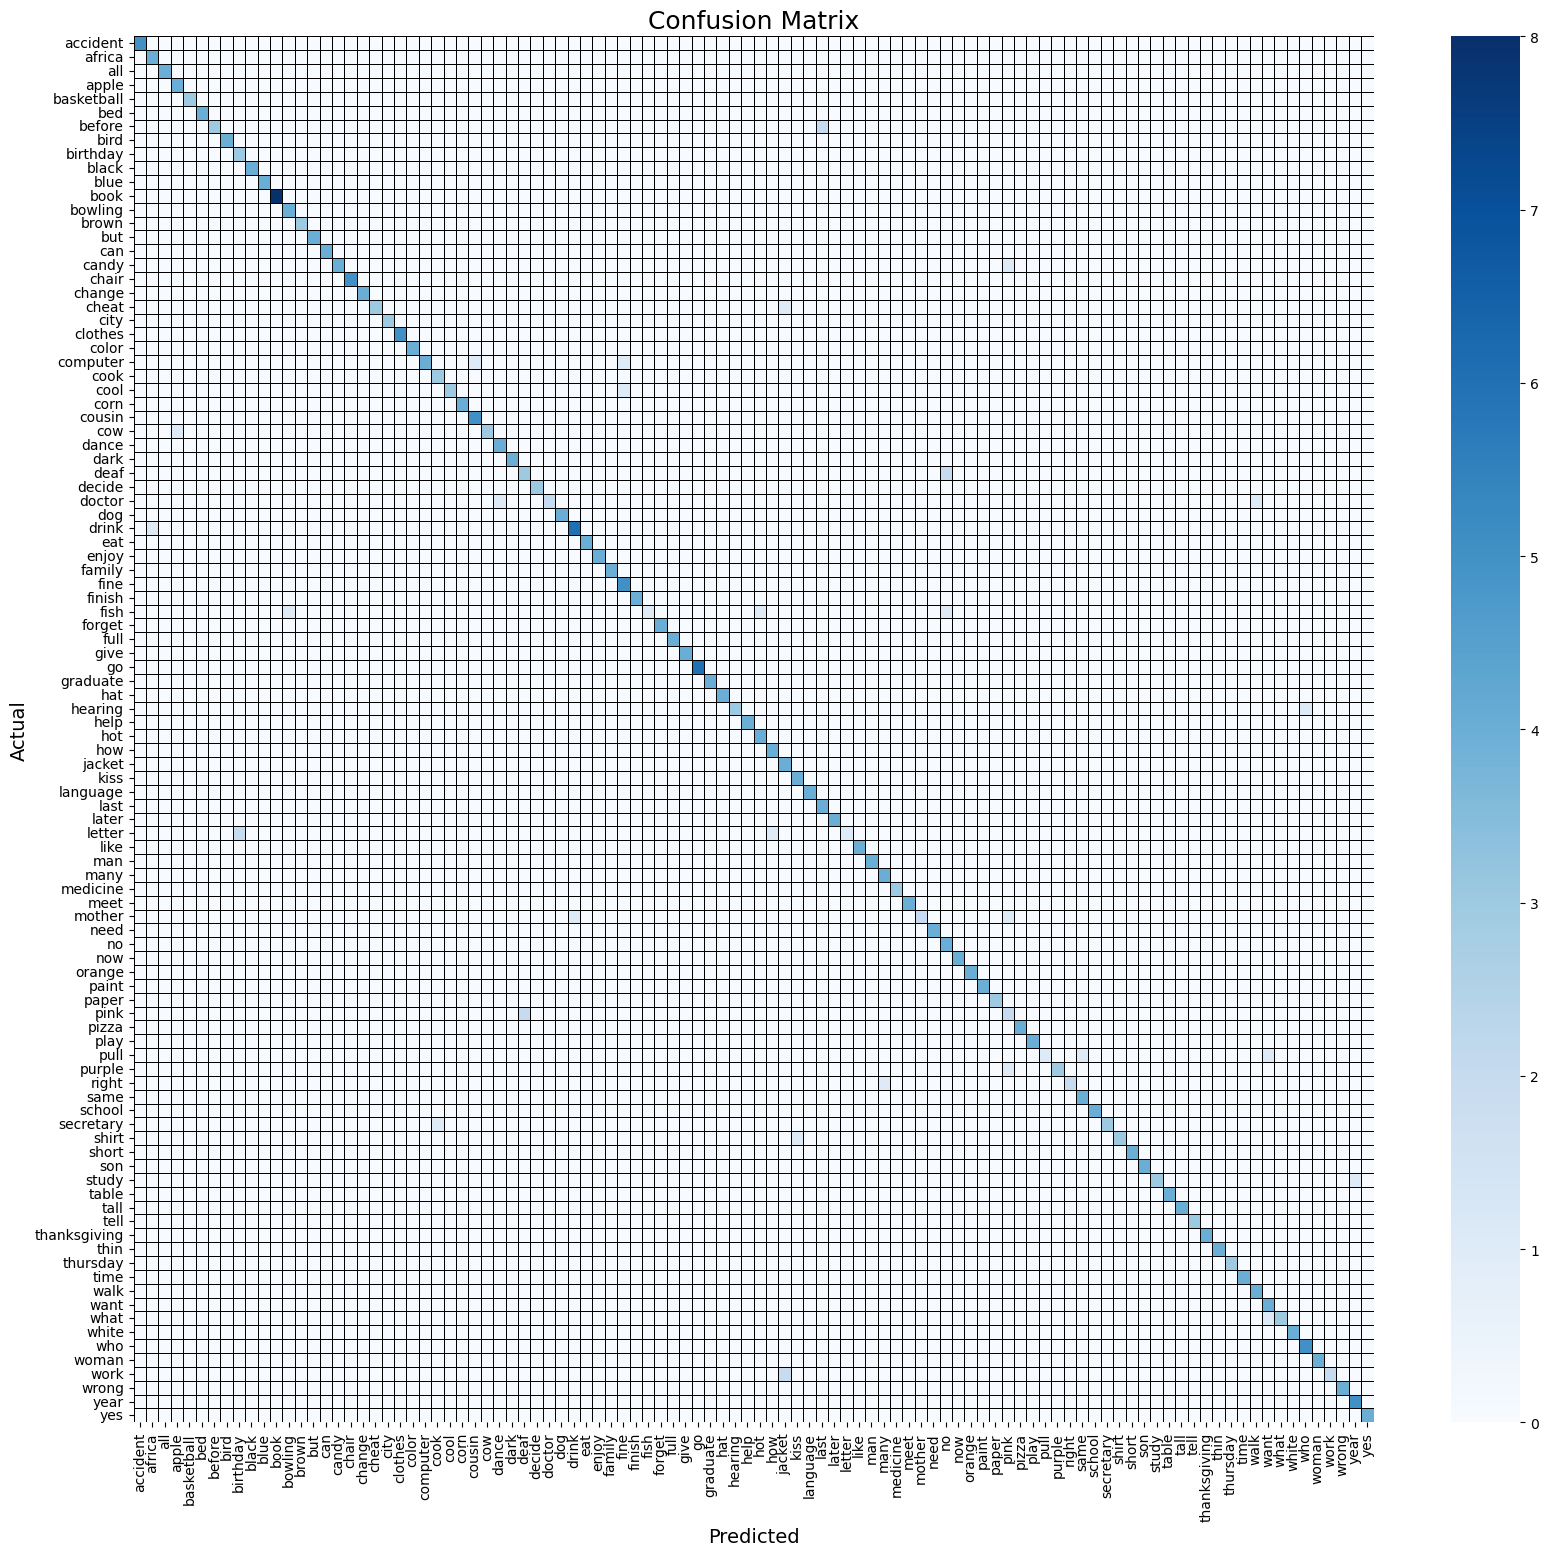

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         4
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      0.60      0.75         5
           7       1.00      1.00      1.00         4
           8       0.60      1.00      0.75         3
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         8
          12       0.80      1.00      0.89         4
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      0.80      0.89         5
    

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Generate Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(all_labels, all_preds)
class_report = classification_report(all_labels, all_preds)

# Step 4: Display Confusion Matrix
plt.figure(figsize=(20, 18)) 
sns.heatmap(
    conf_matrix, 
    annot=False, 
    cmap="Blues", 
    xticklabels=list(label_map.keys()), 
    yticklabels=list(label_map.keys()), 
    linecolor='black',  # Grid color
    linewidths=0.5      # Grid line width
)
plt.title("Confusion Matrix", fontsize=18)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for better fit
plt.yticks(fontsize=10)  # Adjust font size for y-axis labels
plt.show()

# Step 5: Print Classification Report
print("Classification Report:")
print(class_report)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_transformer_diagram_with_bn(filename="transformer_bn_diagram.png"):
    """
    Generates a diagram of the Transformer Encoder architecture with Batch Normalization.
    Saves the diagram as a PNG file.
    """

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_aspect('equal')
    ax.axis('off')

    # --- Input and Projection ---
    input_rect = patches.Rectangle((0, 6), 1, 1, linewidth=1, edgecolor='black', facecolor='lightblue')
    ax.add_patch(input_rect)
    ax.text(0.5, 6.5, "Input", ha='center', va='center')

    proj_rect = patches.Rectangle((1.5, 6), 1, 1, linewidth=1, edgecolor='black', facecolor='lightgreen')
    ax.add_patch(proj_rect)
    ax.text(2, 6.5, "Linear\nProjection", ha='center', va='center')

    # --- BatchNorm 1 ---
    bn1_rect = patches.Rectangle((3, 6), 1, 1, linewidth=1, edgecolor='black', facecolor='yellow')
    ax.add_patch(bn1_rect)
    ax.text(3.5, 6.5, "BatchNorm1d", ha='center', va='center')

    # --- Positional Encoding ---
    pos_enc_rect = patches.Rectangle((4.5, 6), 1, 1, linewidth=1, edgecolor='black', facecolor='coral')
    ax.add_patch(pos_enc_rect)
    ax.text(5, 6.5, "+ Pos.\nEncoding", ha='center', va='center')

    # --- Transformer Encoder ---
    encoder_rect = patches.Rectangle((0, 4), 6, 1.5, linewidth=1, edgecolor='black', facecolor='white')
    ax.add_patch(encoder_rect)
    ax.text(3, 4.75, "Transformer\nEncoder", ha='center', va='center')

    # --- BatchNorm 2 ---
    bn2_rect = patches.Rectangle((6.5, 4.25), 1, 1, linewidth=1, edgecolor='black', facecolor='yellow')
    ax.add_patch(bn2_rect)
    ax.text(7, 4.75, "BatchNorm1d", ha='center', va='center')

    # --- Output Layer ---
    output_rect = patches.Rectangle((8, 4.25), 1, 1, linewidth=1, edgecolor='black', facecolor='lightgreen')
    ax.add_patch(output_rect)
    ax.text(8.5, 4.75, "Linear\nOutput", ha='center', va='center')

    # --- Arrows ---
    ax.arrow(1, 6.5, 0.5, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')
    ax.arrow(2.5, 6.5, 0.5, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')
    ax.arrow(4, 6.5, 0.5, 0.5, head_width=0.1, head_length=0.1, fc='black', ec='black')
    ax.arrow(5.5, 6, 0.5, -1.25, head_width=0.1, head_length=0.1, fc='black', ec='black')
    ax.arrow(6, 4.75, 0.5, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')
    ax.arrow(7.5, 4.75, 0.5, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')

    plt.title("Transformer Encoder Architecture with Batch Normalization", y=1.08)
    plt.xlim(-1, 10)
    plt.ylim(0, 7)
    plt.savefig(filename)
    plt.close()

if __name__ == '__main__':
    draw_transformer_diagram_with_bn()
    print("Transformer diagram with BatchNorm generated and saved as transformer_bn_diagram.png")

Transformer diagram with BatchNorm generated and saved as transformer_bn_diagram.png
